Questo notebook viene utilizzato solo in fase di sviluppo per testare nuove features

In [1]:
import cv2 as cv
import sys
from matplotlib import pyplot as plt
import numpy as np
import colorsys

Mask from image

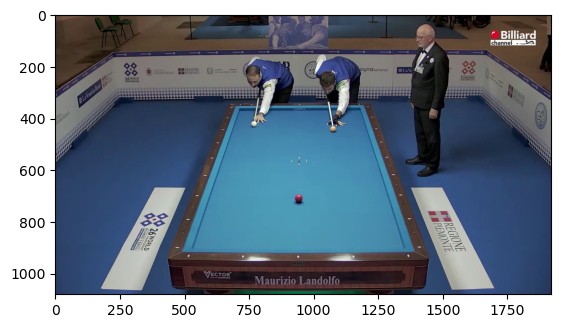

In [2]:
img = cv.imread(cv.samples.findFile("test.png")) # imread legge l'immagine in BGR e non in RGB, quindi il rosso e il blu sono invertiti
if img is None:
    sys.exit("Could not read the image.")
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

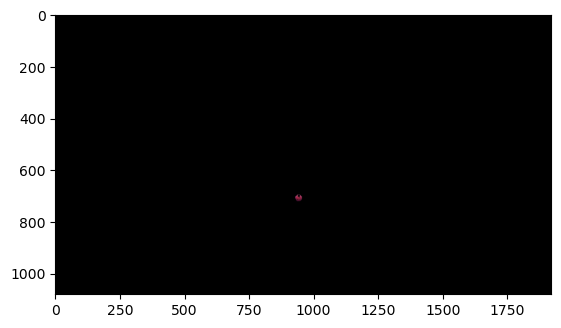

In [46]:
points = [
    (713,362),
    (1180,360),
    (1364,907),
    (525,905),
]
table_colors_hex = [
    "#a22142",
    "#b14979",
    "#42122f",
    "#c45b92"
]

table_colors = []
for color in table_colors_hex:
    r, g, b = int(color[1:3], 16), int(color[3:5], 16), int(color[5:7], 16)
    h, s, v = colorsys.rgb_to_hsv(r/255, g/255, b/255)
    table_colors.append([int(h*178),int(s*255),int(v*255)])

h_diff = 5
s_diff = 10
v_diff = 5
max_H = max(color[0] for color in table_colors) + h_diff
min_H = min(color[0] for color in table_colors) - h_diff

max_S = max(color[1] for color in table_colors) + s_diff
min_S = min(color[1] for color in table_colors) - s_diff

max_V = max(color[2] for color in table_colors) + v_diff
min_V = min(color[2] for color in table_colors) - v_diff

img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

rec_mask = np.zeros(img.shape[:2], dtype=np.uint8)
rec_mask = cv.fillPoly(rec_mask, np.array([points], dtype=np.int32), 255)

result = cv.bitwise_and(img_hsv, img_hsv, mask=rec_mask)

# Crea la maschera per il range di colori in HSV
img_color_masked = cv.inRange(result, (min_H, min_S, min_V), (max_H, max_S, max_V))

# Applica la maschera all'immagine originale
result = cv.bitwise_and(result, result, mask=img_color_masked)

# Visualizza il risultato
plt.imshow(cv.cvtColor(result, cv.COLOR_HSV2RGB))
plt.show()